# **Abstract**

Goal was to quantify the impact of social media on the stock/crypto market. E.Musk's Twitter data with Doge and Tesla data was used to analyze correlations. Conclusions are Tesla's correlation is insignificant while Doge's correlation is significant.

*(p.s. You should invest in Doge if you believe Elon will continue tweeting)* 

Eli Amsellem, Brian Livian, Mazal-tov Amsellem

# **Introduction**
 
Social media has influenced markets in a very transparent way this past decade. These impacts have been noticed specifically with increases or decreases to certain stocks or indexes via Twitter, Instagram, or even YouTube. Most notably, Elon Musk, the world’s current richest man alive, has more recently been influencing markets and his company’s stock price. Elon Musk has been influencing the markets since his first ventures with Zip2 and PayPal. Instead of solely creating new companies and developing new software to impact markets, Musk has used social media platforms which affected global perception and real-time stock values of TESLA and Dogecoin among others. It is hard to believe that one person’s tweets can impact the world, but how we live is very much driven by social media. The extent of his influence has on occasion received notice from the SEC.
 
Musk shared his first tweet in 2010 by making a simple joke. On February 28, 2020 he tweeted “too high” implying that the TESLA stock was too high, which later drove the TESLA stock price down by 12% that day. Another occurrence of Musk’s stock-boosting tweets happened on January 7th of 2021 when he tweeted “Use Signal”, and then Signal Advance stock price tripled in value at closing that day. This never before happened to the company that was generally trading at 60 cents. Comically, Musk was not even referring to the Signal Advance company, rather he was referring to a messaging non-profit app called Signal. From these instances and many others, we can conclude that Musk has quantifiably impacted markets. Though the measaure for how his tweets impact the markets and if we should make investments based off them is the primary area we explore.


# **Research Questions**
 
We explore this larger topic of social media influence on the market by utilizing Tesla and Doge data to quantify the potential impacts.
 

1. Is there a substantial increase in volatility of the Doge and TSLA associated with each tweet (with key words and general tweets) shared by Elon Musk?

2. Is there positive correlation between the Doge or TSLA value and Elon Musk’s tweets?

3. Do the tweets' macro effects retain influence on the equity prices on average for over a month?
 
We can utilize this insight to make strategic intraday or long term invetsment trades. These metrics would prove to be market movers that should be monitored. When influencers that may pertain to markets are watched in real-time investors can hedge the newly proven "social media" risks to investments in markets. The impact tweets and other social media posting can have would become as significant to traders in this regard as quarterly financial publications. This insight will prove to be helpful for future trade decisions and executions. 

#**Research Approach**


The social media data from twitter will be loaded into a GitHub repository. This will provide flexibility for storing the data in different formats such as json or html. The Yahoo Finance data will be loaded into a PostgreSQL database. To easily be able to connect to this database it will be hosted on an AWS server. This will allow connections to the database easily through a google Colab notebook or a local Jupyter notebook. 

Prior to running the statistical analysis there will be an Exploratory Data Analysis performed to understand the data attributes. If any data is missing or if there are data quality issues they will be resolved or managed. Reasoning will be provided for each approach to resolve data issues or missing data. 

Graphs that will be used to analyze the data are bar graphs, histograms, and scatterplots. Additional graphs pertaining to financial markets such as time-series graphs will be used so we can we visualize market changes overtime with number of tweets from Musk. 

To explore the first research question, the ROR (rate of return) of both indexes for a given day, week, and month will be calculated. The ROR will be calculated by using the classic logarithmic return formula. By normalizing both sets of equity data, the RORs will be suitable for comparisons and adequate computations. With the normalized equity data, the variance of the daily RORs can be analyzed. The magnitude of variation inflicted onto the equity data based on the tweet will be measured. By analyzing the surges in volatility, we can deduce if the tweets are culpable.

A Chi Squared test of independence will be conducted to approach the second research question. This will be a statistical measure of correlation between our equity data and the indicator variable derived from time frames of tweets. Along with other correlation metrics we will infer whether we can associate a positive correlation between the indexes and the tweets. 

For the third research question an analysis based on a month's basis of data along with moving average metrics will be conducted to portray the tweets' effects. While analyzing the equity's temporal data on a monthly timeframe we can utilize different moving averages to extrapolate the long-term effects of the tweets directly to the indexes and stock. 

Additional analysis methods to be used are correlation, and cross correlation between the time series and the tweets. By assigning indicators for periods when tweets were made the correlation between the equity data's ROR and the tweet can be measured. The cross correlation will be between the time series for S&P500, NDXT, and TSLA to measure their aligned movement. 


# **Data Collection and Storage**

Social media data used for this project will be sourced from Twitter. The twitter influencer subject of this study will be Elon Musk. Every single Elon Musk tweet since 2010 will be extracted. This will capture all his tweets since he joined twitter in 2010. The method we will use to collect this data is via web scraping. Though Twitter has APIs for users we will not be able to leverage the capability due to the limitations of pulls and history that can be extracted. To manage web scraping from twitter we will leverage the Twint python library. 


*Twint Information: https://pypi.org/project/twint/#:~:text=Twint%20is%20an%20advanced%20Twitter,profiles%20without%20using%20Twitter's%20API.*

The market data for the S&P and NDXT indexes and TSLA will be sourced from Yahoo finance and Market Watch. The downloadable csv files offered by Yahoo could be extracted for Doge to capture data from 2019-2021. The Tesla data from Market Watch had to be extarcted in intervals of one year since that was the site limit and Yahoo finance restricted downloading Tesla historical data.  

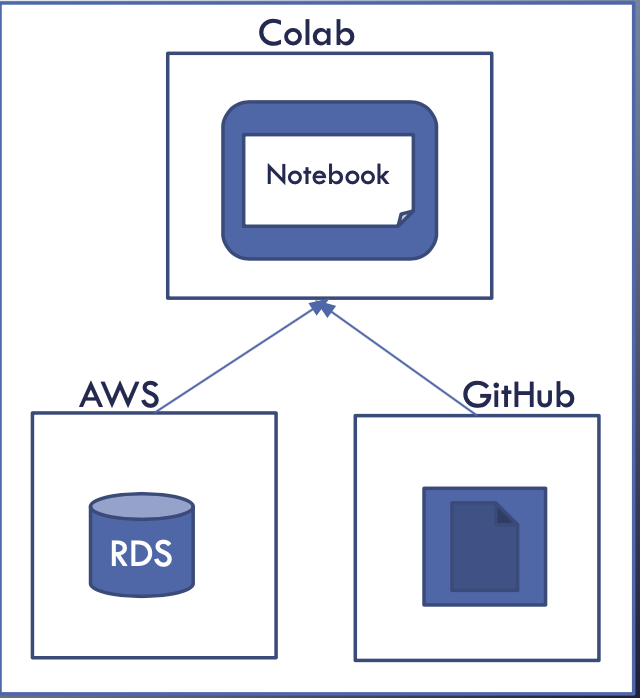


**Setting up the Server in AWS**

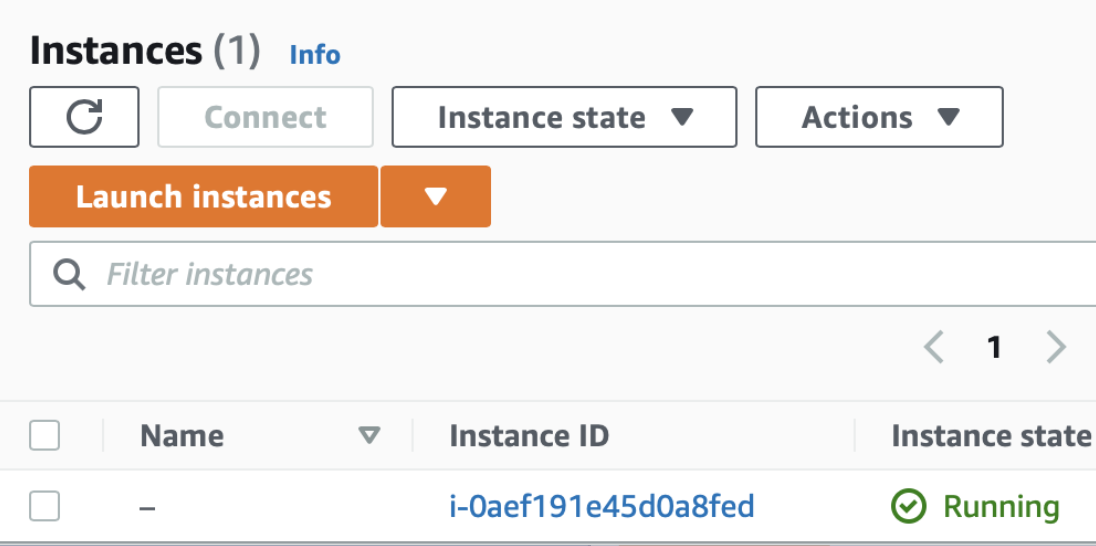

**Setting up the Database in AWS**
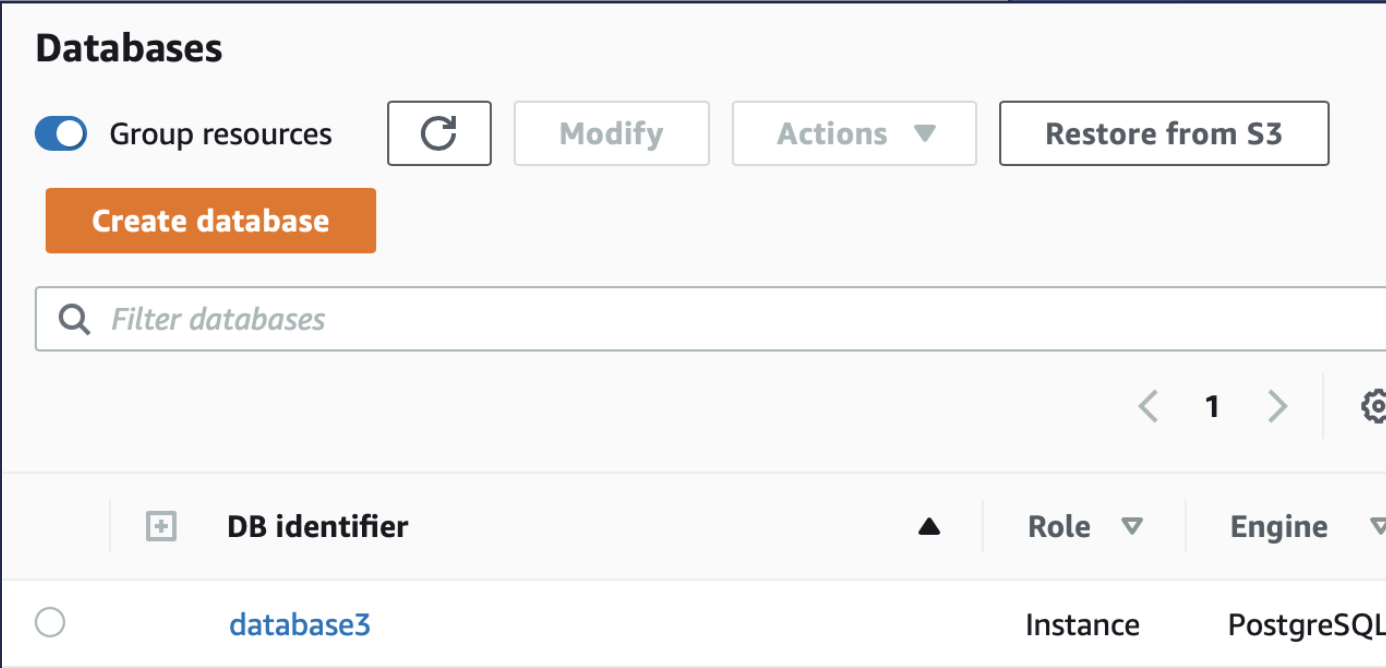

**Loading the Database in Postgres**
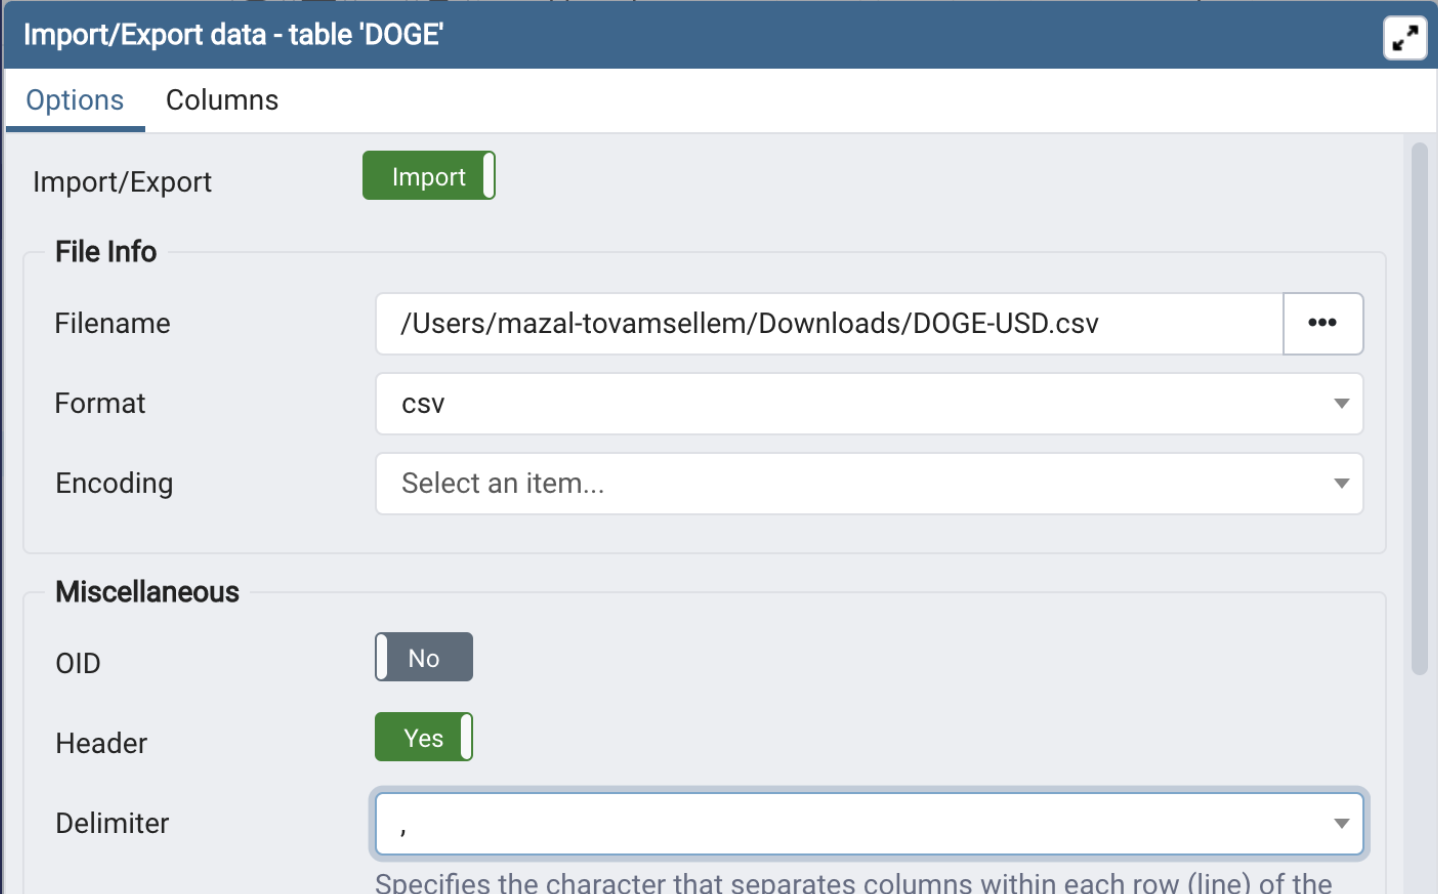

**Links to data sources and libraries:**

*   **GitHub Location for Twitter data:** https://raw.githubusercontent.com/brianlivian/AIM-5001/master/elonsince6-4-10.txt
*   **Twitter Elon Musk:**https://twitter.com/elonmusk
*   **Twintfor Twitter:** https://pypi.org/project/twint/
*   **Market Watch NDXT:** https://www.marketwatch.com/investing/index/ndxt?countryCode=XX
*   **Market Watch TSLA:** https://www.marketwatch.com/investing/stock/TSLA
*   **Yahoo Finance Doge:** https://finance.yahoo.com/quote/DOGE-USD/history?p=DOGE-USD

#**Exploratory Data Analysis**

Explain + present your EDA work including any conclusions you draw from your analysis, including any preliminary predictive inferences. This section should include any Python code used for the EDA.

#**Step 1: Import Tesla data**



***The total set contains 6 attributes.***

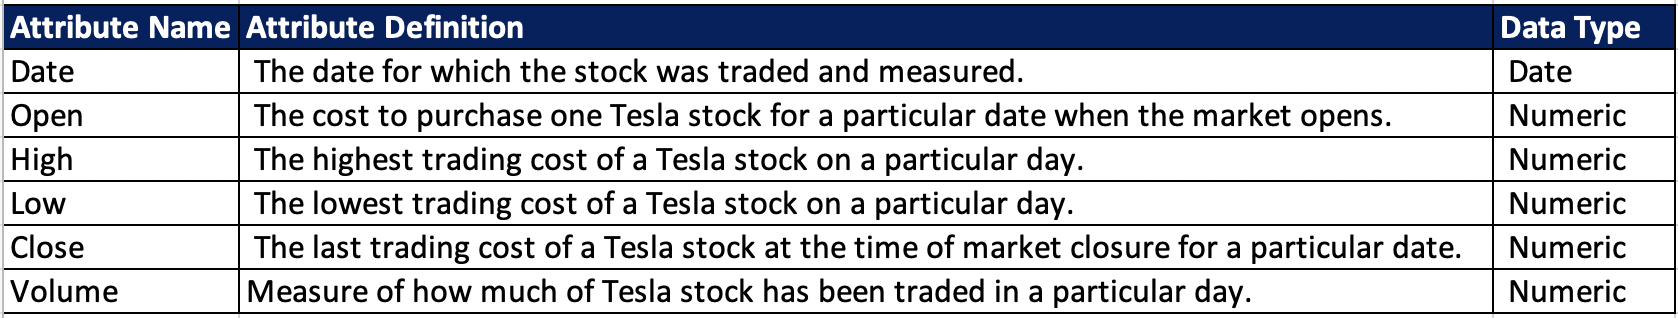


For the purpose of this project, only a subset of the attributes will be used. These will be: Date, Close, and In addition to this, a new attribute, Log of return is calculated as part of our feature scaling. 

There will be 2,598 use cases for the study. If there are missing values or values that does not seem to be valid with respect to data definition, the number of use cases may change and will be explained further as we proceed with doing the analysis of this dataset.



In [409]:
import psycopg2

# connect to postgres
conn = psycopg2.connect(
    host="database3.cpmcwd2cjcis.us-east-1.rds.amazonaws.com",
    database="postgres",
    user="postgres",
    # your password here
    password="postgres")
print()

In [410]:
#Retrieve the Tesla equity data
import pandas as pd
cur = conn.cursor()
curs = conn.cursor()
conn.commit()
Tesla = pd.read_sql_query("""SELECT * FROM "Tesla" ORDER BY "Date" DESC;""", conn)
Tesla = Tesla.drop_duplicates()
Tesla

,Date,Open,High,Low,Close,Volume
0,2021-04-30,667.59,715.47,666.14,709.44,40758719
3,2021-04-29,699.51,702.25,668.50,677.00,28845449
6,2021-04-28,696.41,708.50,693.60,694.40,22271051
9,2021-04-27,717.96,724.00,703.35,704.74,29437000
12,2021-04-26,741.00,749.30,732.61,738.20,31038500
...,...,...,...,...,...,...
2757,2011-01-07,5.60,5.72,5.58,5.65,11247700
2758,2011-01-06,5.37,5.60,5.36,5.58,10306085
2759,2011-01-05,5.30,5.38,5.24,5.37,7234345
2760,2011-01-04,5.33,5.39,5.20,5.33,5945355


**Describe Statistical Variables for the Dataframe:**

In [411]:
Tesla.describe() # stats for all numeric variables

,Open,High,Low,Close,Volume
count,2598.000000,2598.000000,2598.000000,2598.000000,2.598000e+03
mean,85.111940,87.131047,83.055812,85.163430,3.309610e+07
std,151.622444,155.799329,147.505046,151.724557,2.902149e+07
min,4.360000,4.450000,4.220000,4.370000,1.197975e+06
25%,25.262500,25.847500,24.550000,25.262500,1.406096e+07
50%,45.955000,46.635000,45.160000,45.945000,2.646257e+07
75%,63.237500,64.397500,62.157500,63.335000,4.205841e+07
max,891.380000,900.400000,871.600000,883.090000,3.046938e+08


We noticed here that most columns have the same outputs. We later will choose to use "Close" as our primary variable but any variable will suffice since they do not have any statistical signifigances for the most part.

**Checking for Nulls:**

In [412]:
Tesla.columns[Tesla.isnull().any()]

Index([], dtype='object')

We can conclude that there are no Nulls in this dataset. Additionally, we can conclude that we will have 2,598 observations for the analysis of the Tesla data. There are no columns that require data type adjustments.

**Checking Metadata:**

We can conclude that we will have 2,598 observations for the analysis of the Tesla data. There are no columns that require data type adjustments.

In [413]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 0 to 2761
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2598 non-null   datetime64[ns]
 1   Open    2598 non-null   float64       
 2   High    2598 non-null   float64       
 3   Low     2598 non-null   float64       
 4   Close   2598 non-null   float64       
 5   Volume  2598 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 142.1 KB


**Check for Invalid Values & Uniqueness:**

In [414]:
Tesla['Date'].unique()

array(['2021-04-30T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-04-28T00:00:00.000000000', ...,
       '2011-01-05T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [415]:
Tesla['Date'].duplicated().any()

False

The unique values for this set should be the date field since we expect to see only one record for each date. After running this test we know we can use this data with it satisfying our uniquness requirements.

**Graphs & Plots & Aggregations**

In [416]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [417]:
Tesla.groupby(Tesla['Date'].dt.year)['Close'].agg(['sum', 'mean', 'max'])

,sum,mean,max
Date,,,
2011,1350.93,5.360833,6.99
2012,1558.37,6.233480,7.60
2013,5261.93,20.880675,38.67
2014,11255.75,44.665675,57.21
2015,11546.16,46.000637,56.45
2016,10572.28,41.953492,53.08
2017,15778.69,62.863307,77.00
2018,15928.96,63.461992,75.91
2019,13785.94,54.706111,86.19


We can conclude from this aggregation by year that Tesla has had very signifigant growth since 2011 and is about 100x it's first recorded publicly traded price.

Since we are analyzing time series data the closing price of the stock over the period of 10 years is used to get a general idea of how the stock performed for the given period.

In [418]:
#index stock date for plotting purposes
Tesla.index = Tesla['Date']

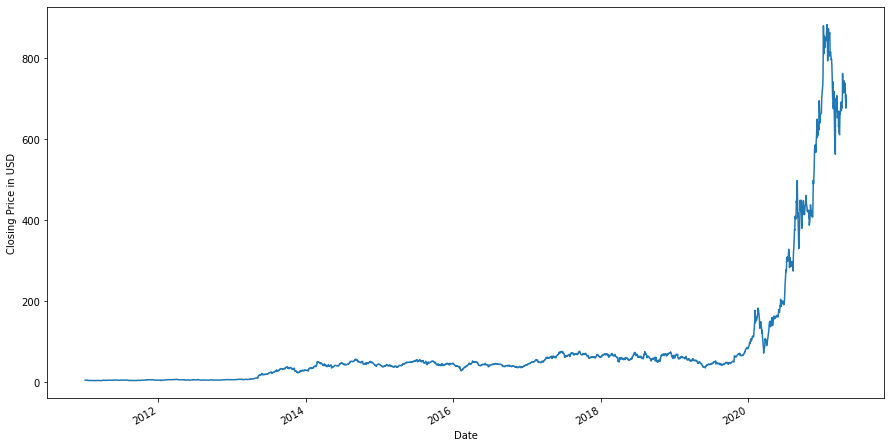

In [419]:
#Create Tesla Price over Time
Tesla['Close'].plot(figsize = (15,8))
plt.ylabel('Closing Price in USD')
plt.show()

There appears to be a horizontal like activity i.e. very little volitility and also no linear improvement, until 2020 where we see signifigant explosive growth. This very apparent explosive change may have an impact on the underlying analysis and will be kept in mind during the analysis and conclusions.

In [420]:
#Calculating Percentage Change for Tesla
Tesla['Day_Perc_Change'] = Tesla['Close'].pct_change()*100
Tesla.head()

,Date,Open,High,Low,Close,Volume,Day_Perc_Change
Date,,,,,,,
2021-04-30,2021-04-30,667.59,715.47,666.14,709.44,40758719,NaN
2021-04-29,2021-04-29,699.51,702.25,668.50,677.00,28845449,-4.572621
2021-04-28,2021-04-28,696.41,708.50,693.60,694.40,22271051,2.570162
2021-04-27,2021-04-27,717.96,724.00,703.35,704.74,29437000,1.489055
2021-04-26,2021-04-26,741.00,749.30,732.61,738.20,31038500,4.747850


Text(0, 0.5, 'Price Change% Per Day')

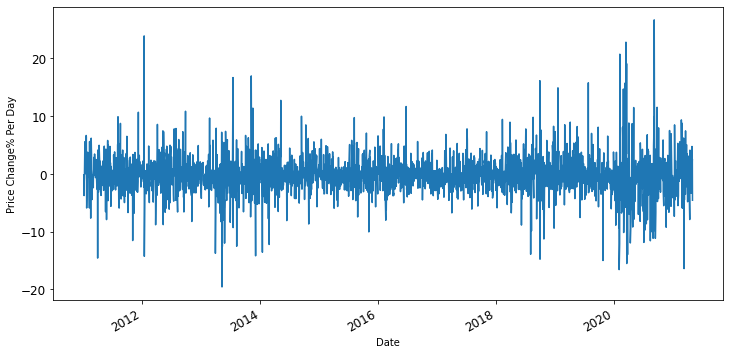

In [421]:
#dropping nulls
Tesla.dropna(axis = 0, inplace = True)
#Create a plot for Price Daily Change over Time
Tesla['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)
plt.ylabel('Price Change% Per Day')

Most of the days, the returns are between -10% to 10% with some spikes crossing 20% mark on both the sides.

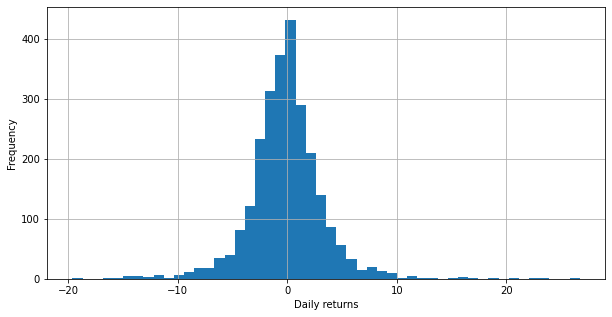

count    2597.000000
mean    -0.127142   
std      3.499953   
min     -19.596542  
25%     -1.858108   
50%     -0.123305   
75%      1.487911   
max      26.683020  
Name: Day_Perc_Change, dtype: float64

In [422]:
Tesla['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
Tesla.Day_Perc_Change.describe()

The Daily return is centered and is somewhat similiar to a normal distribution though this data will still require normalization. 

# **Step 2: Import Doge data**

***The total set contains 754 rows and 7 attributes.***

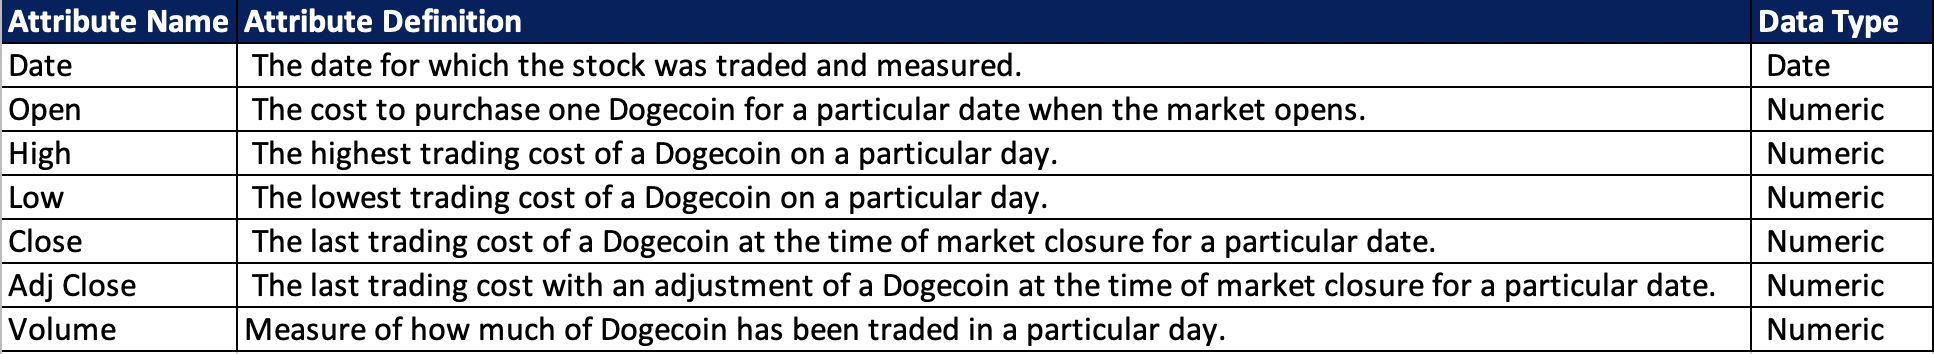

For the purpose of this project, only a subset of the attributes will be used. These will be: Date, Close, and In addition to this, a new attribute, Log of return is calculated as part of our feature scaling.

There will be 754 use cases for the study. If there are missing values or values that does not seem to be valid with respect to data definition, the number of use cases may change and will be explained further as we proceed with doing the analysis of this dataset.



In [423]:
#Retrieve the Doge equity data
import pandas as pd
cur = conn.cursor()
curs = conn.cursor()
conn.commit()
Doge= pd.read_sql_query("""SELECT * FROM "DOGE" ORDER BY "Date" DESC; """, conn)
Doge['Close'] = Doge.Close.astype(float)


In [424]:
Doge

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2021-04-27,0.27142700,0.27962900,0.26492800,0.272188,0.27218800,3590611310.00000000
1,2021-04-26,0.25124000,0.28045200,0.24802600,0.270674,0.27067400,5118886527.00000000
2,2021-04-25,0.26978900,0.28877100,0.22630100,0.251111,0.25111100,6849914675.00000000
3,2021-04-24,0.24954400,0.28939000,0.22989100,0.270212,0.27021200,11057578568.00000000
4,2021-04-23,0.26102300,0.26837800,0.16366900,0.248509,0.24850900,16165566164.00000000
...,...,...,...,...,...,...,...
749,2019-04-05,0.00367900,0.00375500,0.00340900,0.003590,0.00359000,63331136.00000000
750,2019-04-04,0.00315800,0.00409600,0.00313400,0.003697,0.00369700,164634741.00000000
751,2019-04-03,0.00277700,0.00365600,0.00277100,0.003164,0.00316400,89863287.00000000
752,2019-04-02,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000


In [425]:
Doge.describe() # stats for all numeric variables

,Close
count,754.000000
mean,0.013411
std,0.040884
min,0.001537
25%,0.002482
50%,0.002753
75%,0.003381
max,0.407318


We can infer for the above that there are 754 observations and that the prices differ drastically as the min is 0.001 abd the max is 0.4

**Checking for Nulls:**

In [426]:
Doge.columns[Doge.isnull().any()]

Index([], dtype='object')

In [427]:
Doge.isnull().values.any()

False

In [428]:
Doge.isnull().sum().sum()

0

**Checking Metadata:**

The below table provides detail regarding the data types for the Doge data. We can conclude here that we will have 754 observations for the analysis. We have our numeric values as objects so we need to convert them for the analysis.

In [429]:
Doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       754 non-null    datetime64[ns]
 1   Open       754 non-null    object        
 2   High       754 non-null    object        
 3   Low        754 non-null    object        
 4   Close      754 non-null    float64       
 5   Adj_Close  754 non-null    object        
 6   Volume     754 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 41.4+ KB


**Check for Invalid Values & Uniqueness:**

In [430]:
Doge['Date'].unique()

array(['2021-04-27T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-25T00:00:00.000000000', '2021-04-24T00:00:00.000000000',
       '2021-04-23T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-04-21T00:00:00.000000000', '2021-04-20T00:00:00.000000000',
       '2021-04-19T00:00:00.000000000', '2021-04-18T00:00:00.000000000',
       '2021-04-17T00:00:00.000000000', '2021-04-16T00:00:00.000000000',
       '2021-04-15T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-04-12T00:00:00.000000000',
       '2021-04-11T00:00:00.000000000', '2021-04-10T00:00:00.000000000',
       '2021-04-09T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-07T00:00:00.000000000', '2021-04-06T00:00:00.000000000',
       '2021-04-05T00:00:00.000000000', '2021-04-04T00:00:00.000000000',
       '2021-04-03T00:00:00.000000000', '2021-04-02T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-03-31

In [431]:
Doge['Date'].duplicated().any()

False

The unique values for this set should be the date field since we expect to see only one record for each date. After running this test we know we can use this data with it satisfying our uniquness requirements.

**Graphs & Plots & Aggregations**

In [432]:
#Clean the Doge data by changing the date column and removing nulls
Doge['Date'] = pd.to_datetime(Doge['Date'])
Doge = Doge.replace(to_replace ='null', value = "0")
Doge['Close'] = Doge.Close.astype(float)
Doge

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2021-04-27,0.27142700,0.27962900,0.26492800,0.272188,0.27218800,3590611310.00000000
1,2021-04-26,0.25124000,0.28045200,0.24802600,0.270674,0.27067400,5118886527.00000000
2,2021-04-25,0.26978900,0.28877100,0.22630100,0.251111,0.25111100,6849914675.00000000
3,2021-04-24,0.24954400,0.28939000,0.22989100,0.270212,0.27021200,11057578568.00000000
4,2021-04-23,0.26102300,0.26837800,0.16366900,0.248509,0.24850900,16165566164.00000000
...,...,...,...,...,...,...,...
749,2019-04-05,0.00367900,0.00375500,0.00340900,0.003590,0.00359000,63331136.00000000
750,2019-04-04,0.00315800,0.00409600,0.00313400,0.003697,0.00369700,164634741.00000000
751,2019-04-03,0.00277700,0.00365600,0.00277100,0.003164,0.00316400,89863287.00000000
752,2019-04-02,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000


In [433]:
# Create an aggregated Dataframe to review the yearly outcomes
Doge.groupby(Doge['Date'].dt.year)['Close'].agg(['sum', 'mean', 'max'])

,sum,mean,max
Date,,,
2019,0.750755,0.002730,0.003867
2020,0.994215,0.002746,0.004787
2021,8.367191,0.071514,0.407318


Since we are analyzing time series data the closing price of the cyrpto currency over the period of about 3 years is used to get a general idea of how the stock performed for the given period.

In [434]:
#index stock date for plotting purposes
Doge.index = Doge['Date']

**Price Change over Time Plot**

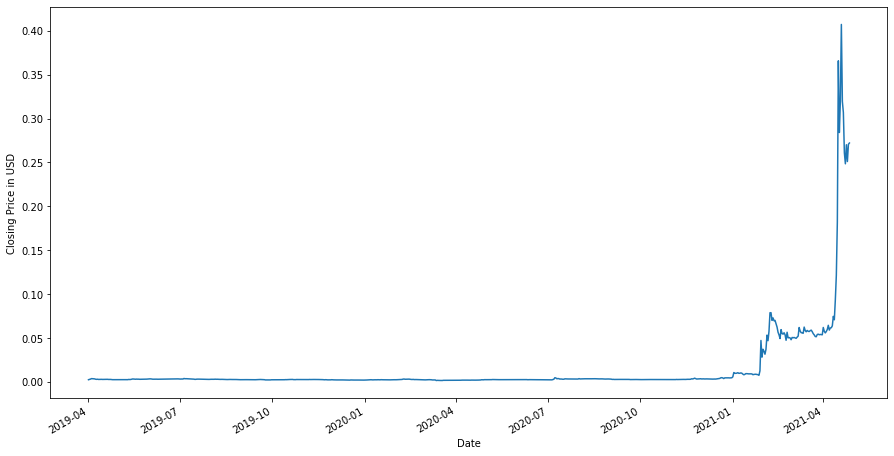

In [435]:
#creating a time series plot to view price change over time
Doge['Close'].plot(figsize = (15,8))
plt.ylabel('Closing Price in USD')
plt.show()

Major takeaway from this is that the prices differences are very drastic i.e. the Y axis is very different. To be able to perform meaningful analysis we will normalize both Doge and tesla data. Similiar to the Tesla stock the Dogecoin has a horizontal like activity with very little volitility or linear growth with time. During 2021 most of the explosive activity took place.

In [436]:
#create a new field to view the percentage change of price over time. 
#This will help us have an even better understanding of thew change 
#in price as it relates to the time period

Doge['Day_Perc_Change'] = Doge['Close'].pct_change()*100
Doge.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change
Date,,,,,,,,
2021-04-27,2021-04-27,0.27142700,0.27962900,0.26492800,0.272188,0.27218800,3590611310.00000000,NaN
2021-04-26,2021-04-26,0.25124000,0.28045200,0.24802600,0.270674,0.27067400,5118886527.00000000,-0.556233
2021-04-25,2021-04-25,0.26978900,0.28877100,0.22630100,0.251111,0.25111100,6849914675.00000000,-7.227514
2021-04-24,2021-04-24,0.24954400,0.28939000,0.22989100,0.270212,0.27021200,11057578568.00000000,7.606596
2021-04-23,2021-04-23,0.26102300,0.26837800,0.16366900,0.248509,0.24850900,16165566164.00000000,-8.031842


In [437]:
#dropping newly created nulls
Doge.dropna(axis = 0, inplace = True)

Text(0, 0.5, '% Change per Day')

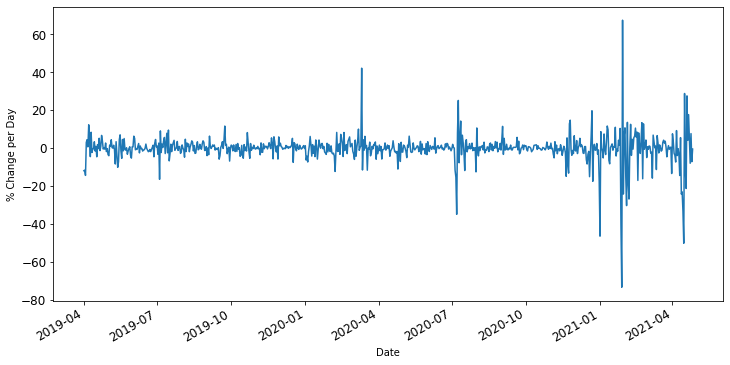

In [438]:
#create a plot for the Price Percentage Change over Time
Doge['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)
plt.ylabel('% Change per Day')

We can conclude that the Dogecoin is much more volitile than Tesla. This is reasonable as it is a crypto currency and has an intangible value to it, or many would say in comparison to the Tesla stock which is valuing a company. We can observe that the values generally range between 0-20%, but then in 2021 it changed drastically with no consistency. 

**Create a Histrogram for Daily Returns**

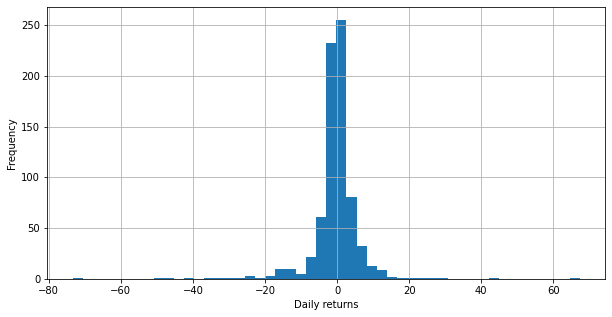

count    753.000000
mean    -0.290291  
std      7.394502  
min     -73.378992 
25%     -1.707838  
50%      0.000000  
75%      1.906341  
max      67.383589 
Name: Day_Perc_Change, dtype: float64

In [439]:
Doge['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
Doge.Day_Perc_Change.describe()

The daily returns histogram are not centered and are very concentrated on 0-10 unlike a normal distribution which would be best for analysis. 

#**Step 3: Import Twitter data**

***The total set contains  3692 rows and 2 attributes.***

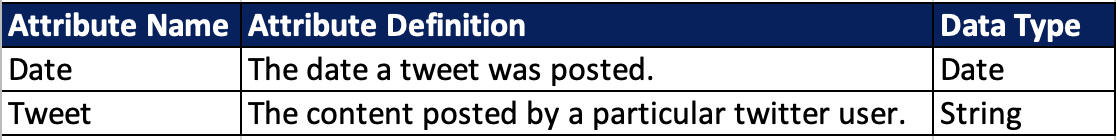



For the purpose of this project, only a subset of the attributes will be used. These will be: Date, Close, and In addition to this, a new attribute, Log of return is calculated as part of our feature scaling. 

There will be 3692 use cases for the study. If there are missing values or values that does not seem to be valid with respect to data definition, the number of use cases may change and will be explained further as we proceed with doing the analysis of this dataset.



**Web scraping code that was run in Anaconda command prompt:**

pip3 install twint

twint -u elonmusk

After this code was run the resulting data was saved as a text document format and loaded into GitHub. This file will be used in the next steps to clean and format the Twitter data for data analytics use cases. To resolve the formatting issues rexgex expressions in python is used and the data is fit into a dataframe.



In [440]:
import base64
import pandas as pd
from sklearn import preprocessing
import requests
import numpy as np
#Extract the text file containing the raw data of Elon's tweets
url = 'https://raw.githubusercontent.com/brianlivian/AIM-5001/master/elonsince6-4-10.txt'
r = requests.get(url)
r.text

'\r\n1387158189985173505 2021-04-27 17:34:19 -0400 <elonmusk> @DocumentingBTC Yes\r\n1387140919145766912 2021-04-27 16:25:41 -0400 <elonmusk> @PPathole Yup\r\n1387140695387951105 2021-04-27 16:24:48 -0400 <elonmusk> @garyblack00 @CGrantWSJ @WSJ I find it more helpful to read/follow individual journalists, rather than publications.   Any given publication is going to have wide range of views, albeit vast majority of stories about any subject are negative, perhaps reflecting innate human biases.  Citizen journalism FTW!\r\n1386841861323698177 2021-04-26 20:37:20 -0400 <elonmusk> @kchangnyt  https://t.co/eLvYOnn6zT\r\n1386836238771105793 2021-04-26 20:15:00 -0400 <elonmusk> Starship SN15 static fire completed, preparing for flight later this week\r\n1386835900169129984 2021-04-26 20:13:39 -0400 <elonmusk> @jeff_foust True 🤣🤣\r\n1386825367948644352 2021-04-26 19:31:48 -0400 <elonmusk> @kchangnyt Can’t get it up (to orbit) lol\r\n1386821871199571968 2021-04-26 19:17:54 -0400 <elonmusk> @hey


*   We can see the messy data resulting from the text file above. 
*   We require for our dataframe tweets that were created by Elon Musk himself as we believe those are moments when he is being influencial instead of using his responses to others which we think are more banterous tweets. At times the tweets may value, but overall we decided to exclude these tweets as we do not think it fits the context of this analysis. 



In [441]:
import re
#Isolate the dates of each tweet
dates = re.findall(r"[0-9]*[-][0-9]*[-][0-9]{2}", r.text)
#Isolate the tweets' text
tweets = re.findall(r"[<elonmusk>].*[\r]", r.text)
tweets = [i.replace(r"<elonmusk> ",'') for i in tweets]
tweets = [i.replace("\r",'') for i in tweets]
#tweets = tweets.replace(r"[<elonmusk>]", "");
tweets = tweets[1:]
len(dates)

12625

In [442]:
import pandas as pd
#Create pandas dataframe containing Elons tweets
Twitter_dict = {'Date':dates, 'Tweet':tweets}
Tweets_df = pd.DataFrame.from_dict(Twitter_dict)


In [443]:
Tweets_df

,Date,Tweet
0,2021-04-27,@PPathole Yup
1,2021-04-27,"@garyblack00 @CGrantWSJ @WSJ I find it more helpful to read/follow individual journalists, rather than publications. Any given publication is going to have wide range of views, albeit vast majority of stories about any subject are negative, perhaps reflecting innate human biases. Citizen journalism FTW!"
2,2021-04-27,@kchangnyt https://t.co/eLvYOnn6zT
3,2021-04-26,"Starship SN15 static fire completed, preparing for flight later this week"
4,2021-04-26,@jeff_foust True 🤣🤣
...,...,...
12620,2011-12-03,That was a total non sequitur btw
12621,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature."
12622,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...
12623,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"


**Describe Statistical Variables for the dataframe**

In [444]:
Tweets_df.describe() # stats for all numeric variables

,Date,Tweet
count,12625,12625
unique,2001,12566
top,2018-05-26,@flcnhvy True
freq,49,6


Since these values are dates and strings there is not much of a takeaway other than the count which represents our tweet observations. We know it will decrease later due to the removal of tweets without relevant terms to Doge and Tesla.

**Checking for Nulls:**

We conclude that there are no Nulls in this data set.

In [445]:
Tweets_df.isnull().values.any()

False

**Checking the Metadata:**

The various data types for our dataframe. Above we describe the ideal types and definitions which this data set will be converted to in this EDA analysis. The Date column needs to be converted to a date data type and the Tweet column can stay as is.

In [446]:
Tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12625 entries, 0 to 12624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    12625 non-null  object
 1   Tweet   12625 non-null  object
dtypes: object(2)
memory usage: 197.4+ KB


In [447]:
# Refine to only his tweets (not replies)
Tweets_df = Tweets_df[~Tweets_df.Tweet.str.startswith("@")]
Tweets_df['Date'] = pd.to_datetime(Tweets_df['Date'])
Tweets_df

,Date,Tweet
3,2021-04-26,"Starship SN15 static fire completed, preparing for flight later this week"
15,2021-04-25,Let’s find out just how live Saturday Night Live really is 😈
16,2021-04-24,Am hosting SNL on May 8
19,2021-04-24,https://t.co/l6Bc0wkWol
20,2021-04-24,define … beauty
...,...,...
12620,2011-12-03,That was a total non sequitur btw
12621,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature."
12622,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...
12623,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"


In [448]:
Tweets_df.describe() # stats for all numeric variables post filtering

,Date,Tweet
count,3692,3692
unique,1535,3686
top,2013-05-24 00:00:00,California time
freq,18,2
first,2010-06-04 00:00:00,NaN
last,2021-04-26 00:00:00,NaN


**Tweets over time Aggregation**

In [449]:
# Create an aggregated Dataframe to review the yearly outcomes
Tweets_df.groupby(Tweets_df['Date'].dt.year)['Tweet'].agg(['count'])

,count
Date,
2010,1
2011,38
2012,234
2013,279
2014,144
2015,223
2016,328
2017,377
2018,605


We can conclude that Elon has changed his habits over time with his usage of Twitter and influence. He tweets between 200-500 Tweets a year though when he started he tweeted around 30 times.

# **Data Preparation**

Below are steps taken to address the data integrity + usability issues identified in EDA.  

Feature engineering techniques applied to the data set include normalization for the purposes of analyzing the values of the stock/crypto price changes.  

In [450]:
Tesla.reset_index(drop=True, inplace=True)

In [451]:
Doge.reset_index(drop=True, inplace=True)

In [452]:
tesla_kw = '|'.join(['Tesla', 'gigafactory', 'stock', 'cybertruck', 'tesla'])
#Extract only those tweets that have keywords related to Tesla in them
print("\n---- Filter with Keywords related to Tesla ----\n")
# Doge_Tweets_df is a dataframe containing all ELon Musk tweets with dogecoin keywords
Tesla_Tweets_df = Tweets_df[Tweets_df['Tweet'].str.contains(tesla_kw)]

# Merge tweets associated with Tesla to TSLA stock historical data
# We use this dataframe to run analytics answering research question 1
# teslatweetsprice is consistent only of trading days aligning with Elons' tweets
teslatweetsprice = pd.merge(Tesla_Tweets_df, Tesla, on = 'Date')
teslatweetsprice


---- Filter with Keywords related to Tesla ----



,Date,Tweet,Open,High,Low,Close,Volume,Day_Perc_Change
0,2021-04-22,Tesla Solar + Powerwall battery enables consumers to be their own utility,741.50,753.77,718.04,719.69,35590262,-1.331231
1,2021-04-22,"Powerwall 2 peak &amp; steady power capability is better than advertised. Now that we have lots of operational data, Tesla can unlock higher capabilities for free via software update next month. Depending on production date, power increase power may be &gt;50% at 30C ambient temp.",741.50,753.77,718.04,719.69,35590262,-1.331231
2,2021-04-21,"Starting next week, Tesla Solar Panels &amp; Solar Roof will only be sold as an integrated product *with* Tesla Powerwall battery",704.77,744.84,698.00,744.12,31215510,3.394517
3,2021-04-14,Tesla AI/Autopilot engineering is awesome! Making excellent progress solving real-world AI.,770.70,780.79,728.03,732.23,49017434,-0.895987
4,2021-04-08,Thanks Tesla suppliers for providing us with critical parts!,677.38,689.55,671.65,683.80,23924330,1.001448
...,...,...,...,...,...,...,...,...
401,2012-02-10,Tesla Model X video http://t.co/pjcaicOc,6.45,6.45,5.97,6.22,9370695,-1.269841
402,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by short sellers http://t.co/PUxAOOm2,5.32,5.47,5.28,5.32,23261930,-0.746269
403,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist any bit of news against Tesla.,5.32,5.47,5.28,5.32,23261930,-0.746269
404,2012-01-13,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 miles of range.",5.68,5.70,4.53,4.56,27532195,-14.285714


In [453]:
# Doge tweets
doge_kw= '|'.join(['doge', 'dogecoin', 'Doge', 'Dogecoin'])
#Extract only those tweets that have keywords related to Doge in them
print("\n---- Filter with Keywords related to Doge ----\n")
# Doge_Tweets_df is a dataframe containing all ELon Musk tweets with dogecoin keywords
Doge_Tweets_df = Tweets_df[Tweets_df['Tweet'].str.contains(doge_kw)]

# Merge tweets associated with Doge to DOGE historical data
# We use this dataframe to run analytics answering research question 1
dogetweetsprice = pd.merge(Doge_Tweets_df, Doge, on = 'Date') 
dogetweetsprice


---- Filter with Keywords related to Doge ----



,Date,Tweet,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change
0,2021-04-15,Doge Barking at the Moon https://t.co/QFB81D7zOL,0.12116700,0.18732600,0.12073600,0.182207,0.18220700,17916620386.00000000,-50.198978
1,2021-04-01,SpaceX is going to put a literal Dogecoin on the literal moon,0.05365500,0.07011100,0.05364400,0.061986,0.06198600,5816046822.00000000,7.495144
2,2021-03-13,"Why are you so dogematic, they ask",0.05535300,0.06243200,0.05475600,0.062432,0.06243200,1869833076.00000000,6.553796
3,2021-03-13,"Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.",0.05535300,0.06243200,0.05475600,0.062432,0.06243200,1869833076.00000000,6.553796
4,2021-03-13,Doge day afternoon,0.05535300,0.06243200,0.05475600,0.062432,0.06243200,1869833076.00000000,6.553796
5,2021-03-06,Doge spelled backwards is Egod,0.04960100,0.05239700,0.04938300,0.050984,0.05098400,1480482384.00000000,-2.183339
6,2021-03-01,Doge meme shield (legendary item) https://t.co/CeomU9q84c,0.04807000,0.05147900,0.04802900,0.050599,0.05059900,1494427207.00000000,0.670487
7,2021-02-21,Dojo 4 Doge,0.05436900,0.05842800,0.05355600,0.055980,0.05598000,2450293068.00000000,4.197301
8,2021-02-14,"If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.",0.06644800,0.06644800,0.05672300,0.062537,0.06253700,3984667628.00000000,10.506971
9,2021-02-11,"Frodo was the underdoge, All thought he would fail, Himself most of all. https://t.co/zGxJFDzzrM",0.07284400,0.07430100,0.06829000,0.069676,0.06967600,3818556739.00000000,-0.560876


In [454]:
# Add columns of indicator variables, indicating if the given tweet contained either a tesla or doge keyword
Tweets_df['Tesla_Keyword'] = np.where(Tweets_df['Tweet'].str.contains(tesla_kw), 1, 0)
Tweets_df['Doge_Keyword'] = np.where(Tweets_df['Tweet'].str.contains(doge_kw), 1, 0)
Tweets_df['Tesla_Keyword'] = Tweets_df['Tesla_Keyword'] == 1
Tweets_df['Doge_Keyword'] = Tweets_df['Doge_Keyword'] == 1
# We have incorporated the indicator variables in Tweets_df so we can compute the Matthews correlation coefficient of keyword tweets and significant trading days
Tweets_df

,Date,Tweet,Tesla_Keyword,Doge_Keyword
3,2021-04-26,"Starship SN15 static fire completed, preparing for flight later this week",False,False
15,2021-04-25,Let’s find out just how live Saturday Night Live really is 😈,False,False
16,2021-04-24,Am hosting SNL on May 8,False,False
19,2021-04-24,https://t.co/l6Bc0wkWol,False,False
20,2021-04-24,define … beauty,False,False
...,...,...,...,...
12620,2011-12-03,That was a total non sequitur btw,False,False
12621,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.",False,False
12622,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,False,False
12623,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT",False,False


In [455]:
"""# Clean the Doge data by changing the date column and removing nulls
Doge['Date'] = pd.to_datetime(Doge['Date'])
Doge = Doge.replace(to_replace ='null', value = "0")
Doge['Close'] = Doge.Close.astype(float)
Doge = Doge.replace(to_replace =0, value = Doge['Close'].mean())
Doge"""

'# Clean the Doge data by changing the date column and removing nulls\nDoge[\'Date\'] = pd.to_datetime(Doge[\'Date\'])\nDoge = Doge.replace(to_replace =\'null\', value = "0")\nDoge[\'Close\'] = Doge.Close.astype(float)\nDoge = Doge.replace(to_replace =0, value = Doge[\'Close\'].mean())\nDoge'

# **Prepped Data Review** 

Presented is the post-Data Prep EDA analysis. 

The re-running of EDA code occured to view the new variables adjusted during the Data Preparation work.

Now the following work will be related to the historical equity data of both Tesla and Doge. We will look to derive some insights of the correlation between the keyword tweets and intraday logarthmic returns. We will also utilize the 30 day moving average to see the long term effects it may have on the equity. 

In [456]:
Doge

,Date,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change
0,2021-04-26,0.25124000,0.28045200,0.24802600,0.270674,0.27067400,5118886527.00000000,-0.556233
1,2021-04-25,0.26978900,0.28877100,0.22630100,0.251111,0.25111100,6849914675.00000000,-7.227514
2,2021-04-24,0.24954400,0.28939000,0.22989100,0.270212,0.27021200,11057578568.00000000,7.606596
3,2021-04-23,0.26102300,0.26837800,0.16366900,0.248509,0.24850900,16165566164.00000000,-8.031842
4,2021-04-22,0.30599000,0.30875700,0.25627600,0.260967,0.26096700,11879823706.00000000,5.013098
...,...,...,...,...,...,...,...,...
748,2019-04-05,0.00367900,0.00375500,0.00340900,0.003590,0.00359000,63331136.00000000,4.390811
749,2019-04-04,0.00315800,0.00409600,0.00313400,0.003697,0.00369700,164634741.00000000,2.980501
750,2019-04-03,0.00277700,0.00365600,0.00277100,0.003164,0.00316400,89863287.00000000,-14.417095
751,2019-04-02,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000,-11.662453


In [457]:
#Generate columns reflecting the intraday logarithmic returns
Tesla['log_ret'] = (Tesla['Close'] - Tesla['Close'].shift(1))/Tesla['Close'].shift(1)

Doge['log_ret'] = (Doge['Close'] - Doge['Close'].shift(1))/Doge['Close'].shift(1)



In [458]:
Tesla

,Date,Open,High,Low,Close,Volume,Day_Perc_Change,log_ret
0,2021-04-29,699.51,702.25,668.50,677.00,28845449,-4.572621,NaN
1,2021-04-28,696.41,708.50,693.60,694.40,22271051,2.570162,0.025702
2,2021-04-27,717.96,724.00,703.35,704.74,29437000,1.489055,0.014891
3,2021-04-26,741.00,749.30,732.61,738.20,31038500,4.747850,0.047479
4,2021-04-23,719.80,737.36,715.46,729.40,28413891,-1.192089,-0.011921
...,...,...,...,...,...,...,...,...
2592,2011-01-07,5.60,5.72,5.58,5.65,11247700,-0.702988,-0.007030
2593,2011-01-06,5.37,5.60,5.36,5.58,10306085,-1.238938,-0.012389
2594,2011-01-05,5.30,5.38,5.24,5.37,7234345,-3.763441,-0.037634
2595,2011-01-04,5.33,5.39,5.20,5.33,5945355,-0.744879,-0.007449


In [459]:
#Breakdown of the standard deviations and means of the log returns 
doge_std =Doge['log_ret'].std()
doge_med = Doge['log_ret'].mean()
print(doge_std)
print(doge_med)
tesla_std =Tesla['log_ret'].std()
tesla_med = Tesla['log_ret'].mean()
print(tesla_std)
print(tesla_med)

0.07399416879661981
-0.0028993730833573703
0.03499538653722666
-0.0012542958022742291


In [460]:
import math
tsd = (math.sqrt(Tesla['log_ret'].var()))
tsd2 = 2*(math.sqrt(Tesla['log_ret'].var()))
sig_pos = Tesla['log_ret'].mean()+tsd2
sig_neg = Tesla['log_ret'].mean()-tsd2
tesladfstd1 = Tesla[Tesla.log_ret > sig_pos]
tesladfstd2 = Tesla[Tesla.log_ret < sig_neg]
frames = [tesladfstd1, tesladfstd2]
tesladfstd = pd.concat(frames)
tesladfstd = tesladfstd.sort_values(by = ['Date'])
tesladfstd

,Date,Open,High,Low,Close,Volume,Day_Perc_Change,log_ret
2566,2011-02-15,4.60,4.63,4.51,4.57,4804255,-7.676768,-0.076768
2536,2011-03-30,4.82,4.90,4.60,4.74,6119385,-14.594595,-0.145946
2498,2011-05-24,5.40,5.50,5.32,5.34,3068365,-7.931034,-0.079310
2449,2011-08-03,5.50,5.57,5.27,5.44,9006645,9.898990,0.098990
2438,2011-08-18,5.00,5.03,4.69,4.85,5282845,8.744395,0.087444
...,...,...,...,...,...,...,...,...
48,2021-02-19,795.00,796.79,777.37,781.30,18958260,9.349195,0.093492
45,2021-02-24,711.85,745.00,694.17,742.02,36766953,8.765501,0.087655
37,2021-03-08,600.55,620.13,558.79,563.00,51786961,-16.416758,-0.164168
30,2021-03-17,656.87,703.73,651.01,701.81,40372449,7.448405,0.074484


In [461]:
# Statisical significance
dsd = (math.sqrt(Doge['log_ret'].var()))
dsd2 = 2*(math.sqrt(Doge['log_ret'].var()))
Dsig_pos = Doge['log_ret'].mean()+dsd
Dsig_neg = Doge['log_ret'].mean()-dsd
Dogedfstd1 = Doge[Doge.log_ret > Dsig_pos]
Dogedfstd2 = Doge[Doge.log_ret < Dsig_neg]
frames = [Dogedfstd1, Dogedfstd2]
Dogedfstd = pd.concat(frames)
Dogedfstd = Dogedfstd.sort_values(by = ['Date'])
Dogedfstd['Date'] = pd.to_datetime(Dogedfstd['Date'])
Dogedfstd

,Date,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change,log_ret
752,2019-04-01,0.00208200,0.00253200,0.00207800,0.002461,0.00246100,49116894.00000000,-11.949911,-0.119499
751,2019-04-02,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000,-11.662453,-0.116625
750,2019-04-03,0.00277700,0.00365600,0.00277100,0.003164,0.00316400,89863287.00000000,-14.417095,-0.144171
746,2019-04-07,0.00344000,0.00351700,0.00325600,0.003418,0.00341800,50224984.00000000,12.249589,0.122496
743,2019-04-10,0.00288100,0.00308000,0.00287200,0.003021,0.00302100,50718761.00000000,8.318394,0.083184
...,...,...,...,...,...,...,...,...,...
8,2021-04-18,0.28510500,0.34991800,0.24644000,0.320475,0.32047500,23464350388.00000000,-21.320688,-0.213207
7,2021-04-19,0.32046600,0.43175100,0.30908000,0.407318,0.40731800,30641432779.00000000,27.486072,0.274861
5,2021-04-21,0.31695300,0.34696600,0.29703600,0.306925,0.30692500,12723463706.00000000,17.610656,0.176107
3,2021-04-23,0.26102300,0.26837800,0.16366900,0.248509,0.24850900,16165566164.00000000,-8.031842,-0.080318


# **Investigative Analysis & Results**




In [462]:
# Doge tweets intersect statistical significance
Doge_tweets = pd.merge(Doge_Tweets_df, Dogedfstd, on = 'Date')
pd.set_option('display.max_colwidth', -1)
Doge_tweets

,Date,Tweet,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change,log_ret
0,2021-04-15,Doge Barking at the Moon https://t.co/QFB81D7zOL,0.12116700,0.18732600,0.12073600,0.182207,0.18220700,17916620386.00000000,-50.198978,-0.501990
1,2021-04-01,SpaceX is going to put a literal Dogecoin on the literal moon,0.05365500,0.07011100,0.05364400,0.061986,0.06198600,5816046822.00000000,7.495144,0.074951
2,2021-02-14,"If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.",0.06644800,0.06644800,0.05672300,0.062537,0.06253700,3984667628.00000000,10.506971,0.105070
3,2021-02-04,"No highs, no lows, only Doge",0.03722600,0.05786900,0.03594500,0.053289,0.05328900,13040837601.00000000,13.537872,0.135379
4,2021-02-04,Dogecoin is the people’s crypto,0.03722600,0.05786900,0.03594500,0.053289,0.05328900,13040837601.00000000,13.537872,0.135379
5,2021-02-04,Doge,0.03722600,0.05786900,0.03594500,0.053289,0.05328900,13040837601.00000000,13.537872,0.135379
6,2019-04-02,Dogecoin value may vary https://t.co/UWerAhPv63,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000,-11.662453,-0.116625
7,2019-04-02,Dogecoin rulz https://t.co/flWWUgAgLU,0.00245900,0.00286300,0.00239400,0.002795,0.00279500,60298362.00000000,-11.662453,-0.116625


In [463]:
# Tesla tweets intersect statistical significance
Tesla_tweets = pd.merge(Tesla_Tweets_df, tesladfstd, on = 'Date')
pd.set_option('display.max_colwidth', -1)
Tesla_tweets

,Date,Tweet,Open,High,Low,Close,Volume,Day_Perc_Change,log_ret
0,2020-08-14,Tesla is developing a NN training computer called Dojo to process truly vast amounts of video data. It’s a beast! Please consider joining our AI or computer/chip teams if this sounds interesting.,333.00,333.76,325.33,330.14,62888049,-10.075450,-0.100755
1,2020-07-24,Tesla solar panels are $1.49/Watt https://t.co/5LpLhqgAzw,283.20,293.00,273.31,283.40,96983094,-7.963107,-0.079631
2,2020-07-02,Thanks Tesla owners &amp; investors! Love you!! We will work super hard to earn your trust &amp; support.,244.30,245.60,237.12,241.73,86250594,-11.880286,-0.118803
3,2020-07-02,Tesla will make fabulous short shorts in radiant red satin with gold trim,244.30,245.60,237.12,241.73,86250594,-11.880286,-0.118803
4,2020-07-01,"Tesla Impact Report (repost). We do everything humanly possible to source materials &amp; produce sustainable energy cars, batteries &amp; solar ethically. Suggestions for improvement are always appreciated. https://t.co/WCemMJ44um",216.60,227.07,216.10,223.93,66634499,-7.363587,-0.073636
5,2020-05-01,Tesla stock price is too high imo,151.00,154.55,136.61,140.26,162659043,-7.869154,-0.078692
6,2020-03-31,"We have extra FDA-approved ventilators. Will ship to hospitals worldwide within Tesla delivery regions. Device &amp; shipping cost are free. Only requirement is that the vents are needed immediately for patients, not stored in a warehouse. Please me or @Tesla know.",100.25,108.59,99.40,104.80,88857449,8.815284,0.088153
7,2020-01-29,A friend just sent me this excerpt from a Tesla blog I wrote 14 years ago https://t.co/Hr8w52ithY,115.14,117.96,113.49,116.20,91083349,-9.332085,-0.093321
8,2019-10-24,Tesla Solar Tile Roof V3 launch tomorrow at 2pm,59.67,60.99,57.84,59.94,149096148,-8.669816,-0.086698
9,2019-10-23,Super proud of Tesla team for great execution &amp; support of Tesla customers greatly appreciated!!,50.90,51.23,50.27,50.94,56080899,-15.015015,-0.150150


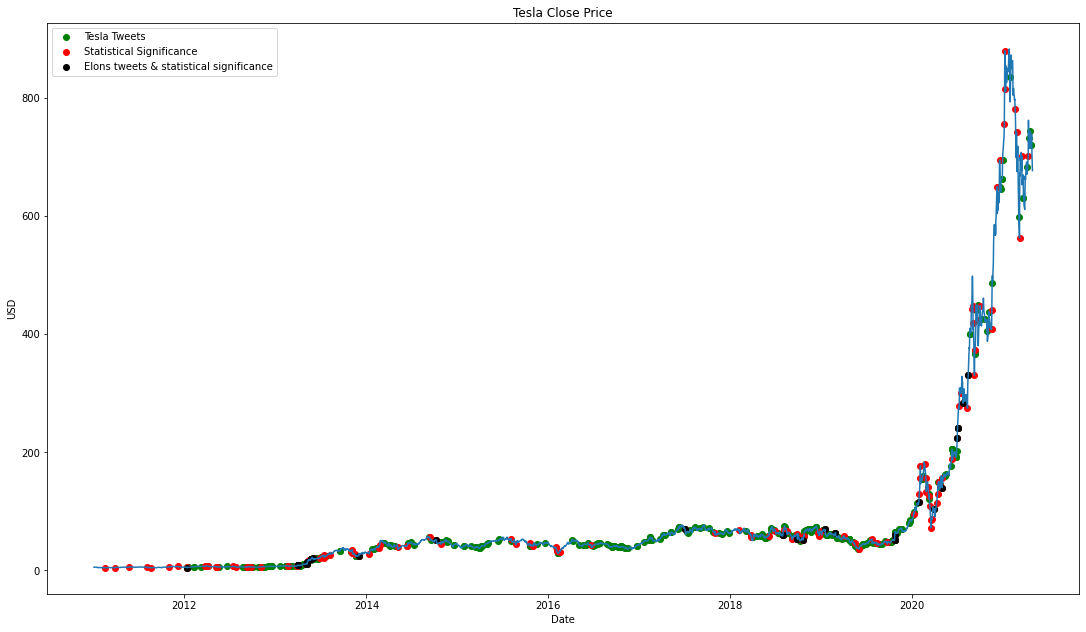

In [464]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(Tesla.Date, Tesla.Close)
plt.scatter(teslatweetsprice.Date, teslatweetsprice.Close, color = 'green', label = 'Tesla Tweets')
plt.scatter(tesladfstd.Date, tesladfstd.Close, color = 'red', label = 'Statistical Significance')
plt.scatter(Tesla_tweets.Date, Tesla_tweets.Close, color = 'black', label = 'Elons tweets & statistical significance')
plt.title('Tesla Close Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc="upper left")
fig.set_size_inches(18.5, 10.5)


plt.show()

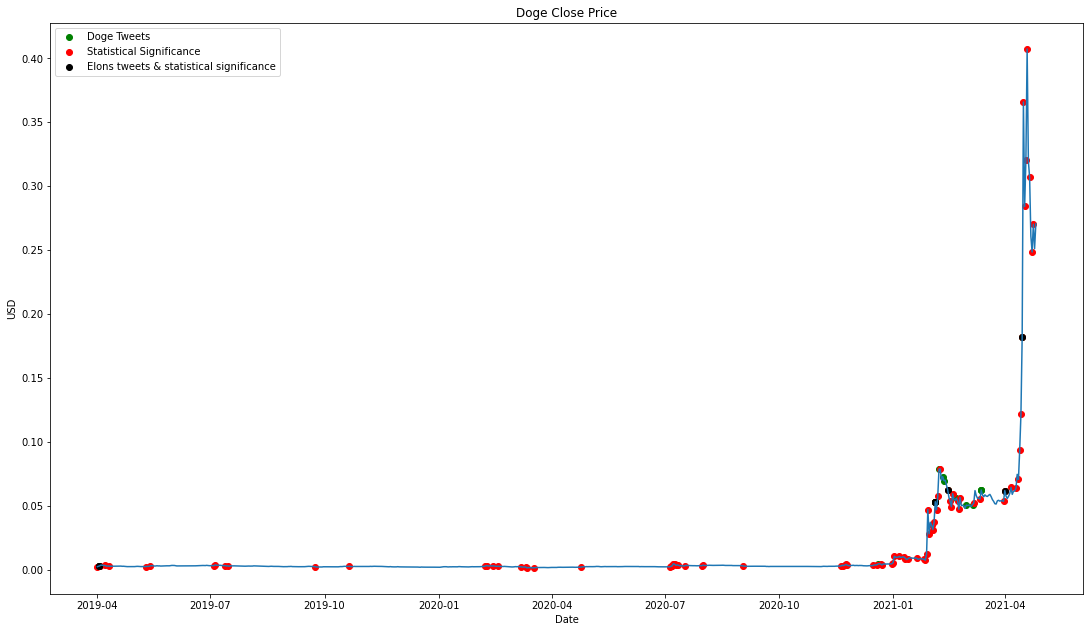

In [465]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(Doge.Date, Doge.Close)
plt.scatter(dogetweetsprice.Date, dogetweetsprice.Close, color = 'green', label = 'Doge Tweets')
plt.scatter(Dogedfstd.Date, Dogedfstd.Close, color = 'red', label = 'Statistical Significance')
plt.scatter(Doge_tweets.Date, Doge_tweets.Close, color = 'black', label = 'Elons tweets & statistical significance')
plt.title('Doge Close Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc="upper left")
fig.set_size_inches(18.5, 10.5)


plt.show()

In [466]:
TeslaTweetsPctSig = len(Tesla_tweets)/ len(teslatweetsprice)
PctSigTeslaTweets = len(Tesla_tweets)/ len(tesladfstd)

print(str(100 * TeslaTweetsPctSig) + '% of Tesla tweets are associated to a statistical significance')
print(str(100 * PctSigTeslaTweets) + '% of statistically significant days in TSLA are associated to a Tesla Tweet')

DogeTweetsPctSig = len(Doge_tweets)/ len(dogetweetsprice)
PctSigDogeTweets = len(Doge_tweets)/ len(Dogedfstd)

print(str(100 * DogeTweetsPctSig) + '% of Doge tweets are associated to a statistical significance')
print(str(100 * PctSigDogeTweets) + '% of statistically significant days in DOGE are associated to a Doge Tweet')

8.866995073891626% of Tesla tweets are associated to a statistical significance
27.06766917293233% of statistically significant days in TSLA are associated to a Tesla Tweet
44.44444444444444% of Doge tweets are associated to a statistical significance
9.30232558139535% of statistically significant days in DOGE are associated to a Doge Tweet


In [467]:
#30 day moving avrge
Doge['MA_30'] = Doge.Close.rolling(30, min_periods=1).mean()
Tesla['MA_30'] = Tesla.Close.rolling(30, min_periods=1).mean()


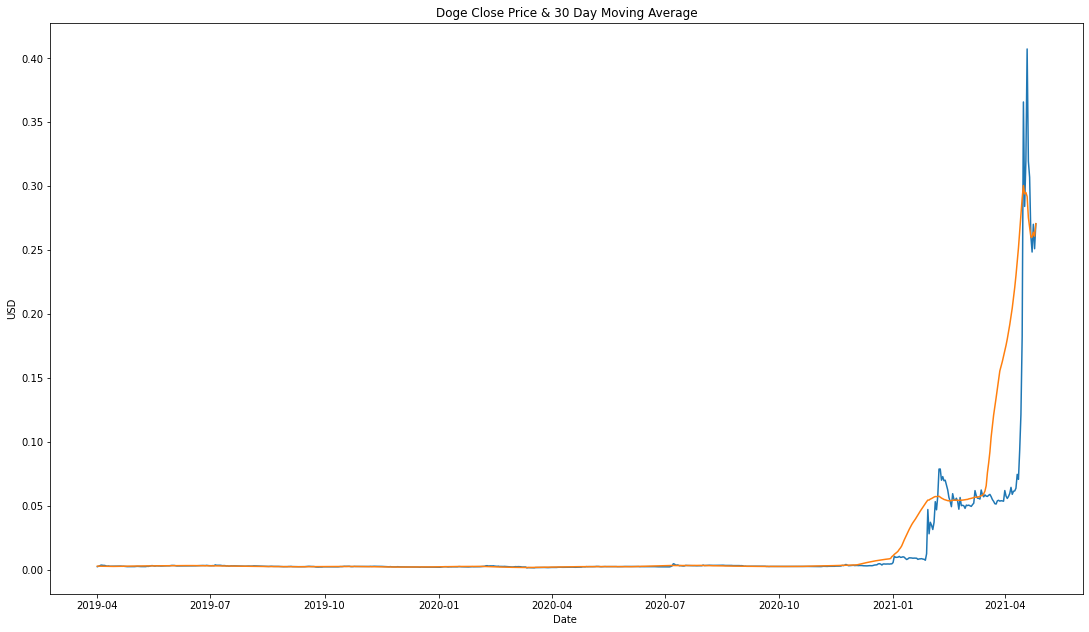

In [468]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(Doge.Date, Doge.Close)
plt.plot(Doge.Date, Doge.MA_30)
plt.title('Doge Close Price & 30 Day Moving Average')
plt.xlabel('Date ')
plt.ylabel('USD')
fig.set_size_inches(18.5, 10.5)

plt.show()

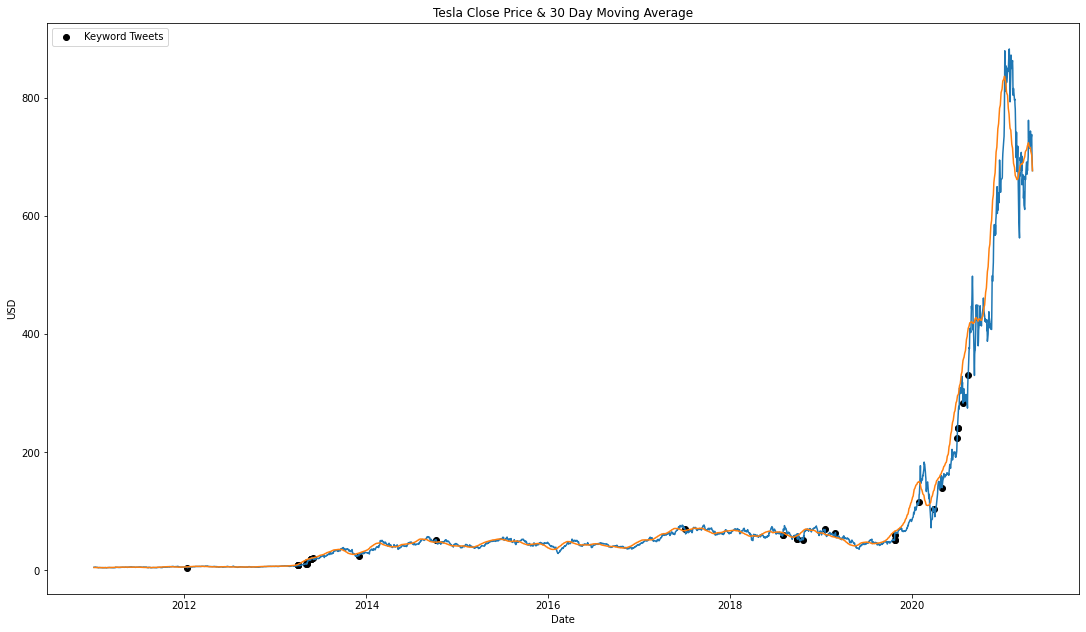

In [469]:
fig = plt.gcf()
plt.plot(Tesla.Date, Tesla.Close)
plt.plot(Tesla.Date, Tesla.MA_30)
plt.scatter(Tesla_tweets.Date, Tesla_tweets.Close,color = 'black', label = 'Keyword Tweets') 
plt.title('Tesla Close Price & 30 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc="upper left")
fig.set_size_inches(18.5, 10.5)


plt.show()

In [470]:
import math
from scipy import stats
# Add columns of indicator variables that represent whether that day had volatility 
Tesla['Volatile'] = abs(Tesla['log_ret'])>abs(abs(Tesla['log_ret'].median())+math.sqrt(Tesla['log_ret'].var()))
Tesla['Highly Volatile'] = abs(Tesla['log_ret'])>abs(abs(Tesla['log_ret'].median())+ (2*math.sqrt(Tesla['log_ret'].var())))
Doge['Volatile'] = abs(Doge['log_ret'])>abs(abs(Doge['log_ret'].median())+math.sqrt(Doge['log_ret'].var()))
Doge['Highly Volatile'] = abs(Doge['log_ret'])>abs(abs(Doge['log_ret'].median())+ (2*math.sqrt(Doge['log_ret'].var())))

In [471]:
# normalize the equity data
norm_Tesla = Tesla
norm_Tesla['Close'] = (norm_Tesla['Close']-norm_Tesla['Close'].mean())/norm_Tesla['Close'].std()

In [472]:
#normalize the equity data
norm_Doge = Doge
norm_Doge['Close'] = (norm_Doge['Close']-norm_Doge['Close'].mean())/norm_Doge['Close'].std()


In [473]:
norm_Doge['MA_30'] = norm_Doge.Close.rolling(30, min_periods=1).mean()
norm_Tesla['MA_30'] = norm_Tesla.Close.rolling(30, min_periods=1).mean()

No handles with labels found to put in legend.


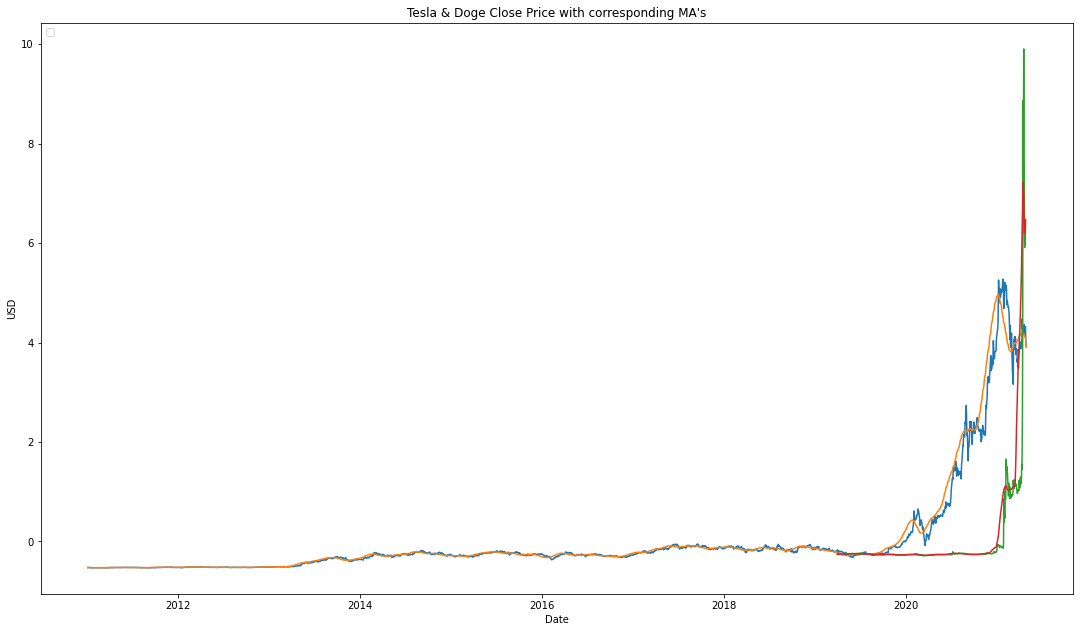

In [474]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(norm_Tesla.Date, norm_Tesla.Close)
plt.plot(norm_Tesla.Date, norm_Tesla.MA_30)
plt.plot(norm_Doge.Date, norm_Doge.Close)
plt.plot(norm_Doge.Date, norm_Doge.MA_30)
plt.title('Tesla & Doge Close Price with corresponding MA\'s')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc="upper left")
fig.set_size_inches(18.5, 10.5)


plt.show()

In [475]:
# Tesla tweets intersect statistical significance
Teslatweets = pd.merge(Tesla,Tweets_df, on = 'Date')
pd.set_option('display.max_colwidth', -1)
Teslatweets.fillna(method='ffill')
Teslatweets

,Date,Open,High,Low,Close,Volume,Day_Perc_Change,log_ret,MA_30,Volatile,Highly Volatile,Tweet,Tesla_Keyword,Doge_Keyword
0,2021-04-26,741.00,749.30,732.61,4.318954,31038500,4.747850,0.047479,4.090107,True,False,"Starship SN15 static fire completed, preparing for flight later this week",False,False
1,2021-04-23,719.80,737.36,715.46,4.260775,28413891,-1.192089,-0.011921,4.124240,False,False,2 mins to launch,False,False
2,2021-04-23,719.80,737.36,715.46,4.260775,28413891,-1.192089,-0.011921,4.124240,False,False,Astronauts preparing to launch to @Space_Station,False,False
3,2021-04-22,741.50,753.77,718.04,4.196580,35590262,-1.331231,-0.013312,4.136297,False,False,🌍🌎🌏 Happy Earth Day 🌍🌎🌏,False,False
4,2021-04-22,741.50,753.77,718.04,4.196580,35590262,-1.331231,-0.013312,4.136297,False,False,Tesla Solar + Powerwall battery enables consumers to be their own utility,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2011-12-21,5.58,5.61,5.21,-0.525017,8529035,-0.720721,-0.007207,-0.524499,False,False,Why does the crowd cry over the glorious leader Kim Il Sung's death? Fear of being shot may play a role: http://t.co/hoQrYtG1,False,False
2572,2011-12-21,5.58,5.61,5.21,-0.525017,8529035,-0.720721,-0.007207,-0.524499,False,False,Sam Harris also wrote a nice piece on the awesomeness of Hitchens: http://t.co/fPkLiK3v May the good man RIP.,False,False
2573,2011-12-21,5.58,5.61,5.21,-0.525017,8529035,-0.720721,-0.007207,-0.524499,False,False,"Read ""Lying"", the new book by my friend Sam Harris. Excellent cover art and lots of good reasons not to lie!",False,False
2574,2011-12-01,6.51,6.80,6.40,-0.518339,5150540,-2.102102,-0.021021,-0.522947,False,False,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...,False,False


In [476]:
# Doge tweets intersect statistical significance
Dogetweets = pd.merge(Tweets_df, Doge, on = 'Date')
pd.set_option('display.max_colwidth', -1)
Dogetweets.fillna(method='ffill')
Dogetweets

,Date,Tweet,Tesla_Keyword,Doge_Keyword,Open,High,Low,Close,Adj_Close,Volume,Day_Perc_Change,log_ret,MA_30,Volatile,Highly Volatile
0,2021-04-26,"Starship SN15 static fire completed, preparing for flight later this week",False,False,0.25124000,0.28045200,0.24802600,6.471492,0.27067400,5118886527.00000000,-0.556233,NaN,6.471492,False,False
1,2021-04-25,Let’s find out just how live Saturday Night Live really is 😈,False,False,0.26978900,0.28877100,0.22630100,5.980038,0.25111100,6849914675.00000000,-7.227514,-0.072275,6.225765,False,False
2,2021-04-24,Am hosting SNL on May 8,False,False,0.24954400,0.28939000,0.22989100,6.459886,0.27021200,11057578568.00000000,7.606596,0.076066,6.303805,True,False
3,2021-04-24,https://t.co/l6Bc0wkWol,False,False,0.24954400,0.28939000,0.22989100,6.459886,0.27021200,11057578568.00000000,7.606596,0.076066,6.303805,True,False
4,2021-04-24,define … beauty,False,False,0.24954400,0.28939000,0.22989100,6.459886,0.27021200,11057578568.00000000,7.606596,0.076066,6.303805,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2019-04-03,"Obv just someone in a 🐿 suit. Also, very s us that a 🦊 is reporting on this. https://t.co/RZyhczaRCf",False,False,0.00277700,0.00365600,0.00277100,-0.248797,0.00316400,89863287.00000000,-14.417095,-0.144171,-0.256313,True,False
1300,2019-04-02,Dogecoin value may vary https://t.co/UWerAhPv63,False,True,0.00245900,0.00286300,0.00239400,-0.258067,0.00279500,60298362.00000000,-11.662453,-0.116625,-0.256158,True,False
1301,2019-04-02,Dogecoin rulz https://t.co/flWWUgAgLU,False,True,0.00245900,0.00286300,0.00239400,-0.258067,0.00279500,60298362.00000000,-11.662453,-0.116625,-0.256158,True,False
1302,2019-04-02,Yup,False,False,0.00245900,0.00286300,0.00239400,-0.258067,0.00279500,60298362.00000000,-11.662453,-0.116625,-0.256158,True,False


In [477]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
#sns.boxplot(x=Dtweets['Key_Tweets'], y=Dtweets['Volatile'])
Doge_corr = matthews_corrcoef(Dogetweets['Doge_Keyword'], Dogetweets['Volatile'])
Doge_high_corr = matthews_corrcoef(Dogetweets['Doge_Keyword'], Dogetweets['Highly Volatile'])
Tesla_corr = matthews_corrcoef(Teslatweets['Tesla_Keyword'], Teslatweets['Volatile'])
Tesla_high_corr = matthews_corrcoef(Teslatweets['Tesla_Keyword'], Teslatweets['Highly Volatile'])
print('Doge equity volatility correlation with tweets: ' + str(Doge_corr))
print('Doge equity high volatility correlation with tweets: ' + str(Doge_high_corr))
print('Tesla equity volatility correlation with tweets: ' + str(Tesla_corr))
print('Tesla equity high volatility correlation with tweets: ' + str(Tesla_high_corr))

Doge equity volatility correlation with tweets: 0.11601983430452009
Doge equity high volatility correlation with tweets: 0.011184995435301048
Tesla equity volatility correlation with tweets: 0.0104747364510258
Tesla equity high volatility correlation with tweets: 0.0158381974090971


# **Conclusions**


Conclusions are Tesla's correlation is relativelty insignificant while Doge's correlation is somewhat significant.

1.	**Is there a substantial increase in volatility of TSLA and DOGE associated with each tweet shared by Elon Musk?**
We conclude that Musk has an impact on the volatility of TSLA and DOGE. However, Musk’s impact on DOGE is significantly higher than that of TSLA. 44% of Musk’s tweets with a Dogecoin keyword are associated to a significant change in DOGE price. 8.9 % of Musk’s tweets with a Tesla keyword are associated to a significant change in TSLA price.

2. **Is there a positive correlation between the value of TSLA and DOGE and Elon Musks' tweets?**
In analyzing the correlation between the TSLA and DOGE equity data and Elon Musks' tweets we had to utilize the Matthews Correlation Coefficient or Phi coefficient. The Matthews correlation coefficient is used in machine learning to measure correlation between binary and categorical data types. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is a correlation coefficient value between -1 and +1 just like any other correlation metric. A coefficient of +1 represents a strong positive correlation, 0 an average random prediction and -1 an inverse correlation. We performed the MCC metric on the boolean variables of tweets that contained keywords regarding one of the equity variables [TSLA/DOGE] and if the corresponding day was volatile or highly volatile. 


**These were our results:**
Doge equity volatility correlation with tweets: 0.11601983430452009
Doge equity high volatility correlation with tweets: 0.011184995435301048
Tesla equity volatility correlation with tweets: 0.0104747364510258
Tesla equity high volatility correlation with tweets: 0.0158381974090971

From the resulting correlations we can conclude that there weren’t any significantly strong correlations between the two variables. This can be attributed to Elon tweeting in regards to Tesla much more often than we anticipated and Doge being extremely volatile as is.

3. **Do the tweets' macro effects retain influence on the stock prices or cryptocurrencies  on average for over a month?** In analyzing the macro long term effects of Elons’ tweets, we implemented a 30 day moving average to review the crossovers and their correspondence with keyword tweets. For the Tesla equity’s moving average we see several keyword tweets surge the equity data past the moving average reflecting a short term effect. However, in the entirety of the equity data we can conclude that the moving average seems to remain above the equity surges aligned with tweets and the presence of later crossovers are independent of the tweets. 
In regards to the Doge equity data we can’t make as concise conclusions. As a result of the extremely high volatility lately there seems to be no significant crossovers related to Elons’ tweets and the latest equity surge lays far beyond the moving average leaving us with no reliable results or conclusions to relate to the tweets